<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#2.-Comparing-SVM-and-simple-neural-networks" data-toc-modified-id="2.-Comparing-SVM-and-simple-neural-networks-1">2. Comparing SVM and simple neural networks</a></span><ul class="toc-item"><li><span><a href="#Part-1.-Divorce-classification/prediction" data-toc-modified-id="Part-1.-Divorce-classification/prediction-1.1">Part 1. Divorce classification/prediction</a></span><ul class="toc-item"><li><span><a href="#a.-Testing-accuracy" data-toc-modified-id="a.-Testing-accuracy-1.1.1">a. Testing accuracy</a></span></li><li><span><a href="#b.-Classifiers-on-two-features" data-toc-modified-id="b.-Classifiers-on-two-features-1.1.2">b. Classifiers on two features</a></span></li></ul></li></ul></li><li><span><a href="#Part-2:-Handwritten-digits-classification" data-toc-modified-id="Part-2:-Handwritten-digits-classification-2">Part 2: Handwritten digits classification</a></span></li></ul></div>

# 2. Comparing SVM and simple neural networks

In [1]:
# Libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

%matplotlib inline
np.random.seed(503)

## Part 1. Divorce classification/prediction

### a. Testing accuracy

In [2]:
# Load divorce dataset
divorce = np.loadtxt('q3.csv', dtype='float', delimiter=',')

In [3]:
# Standardize data by calculating mean of each feature and subtracting from the column's values, then divide by std dev
# SVM works best with standardized data because the decision boundary is affected by scale of input data
# Then split data: 80% train, 20% test
X, y = divorce[:, :-1], divorce[:, -1]

mu = np.mean(X, axis=0)
sd = np.std(X, axis=0)
X = (X - mu)/sd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
# Neural network
def score_nn(step_size, X_train, y_train, X_test, y_test):
    """Trains and scores a neural network given a step size for gradient descent and a pre-split dataset."""
    clf_nn = MLPClassifier(hidden_layer_sizes=(5, 2),
                           solver='sgd',  # Stochastic gradient descent
                           learning_rate_init=step_size,   # Controls step size
                           random_state=503)
    clf_nn.fit(X_train, y_train)
    y_pred = clf_nn.predict(X_test)
    nn_accuracy = np.where(y_pred == y_test)[0].shape[0] / y_test.shape[0]
    
    return clf_nn, nn_accuracy

In [5]:
# Try various step sizes for neural network
nn_step_sizes = [0.1, 0.01, 0.001]
nn_accuracies = []

for step_size in nn_step_sizes:
    clf_nn, nn_accuracy = score_nn(step_size, X_train, y_train, X_test, y_test)
    nn_accuracies.append(nn_accuracy)
    
    print(f"Step size: {step_size}, accuracy: {nn_accuracy}")

Step size: 0.1, accuracy: 1.0
Step size: 0.01, accuracy: 1.0
Step size: 0.001, accuracy: 1.0


C:\Users\ArthurWang\.conda\envs\omsa\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ArthurWang\.conda\envs\omsa\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [6]:
# Get the best neural network with its step size and score
best_nn_step_size = nn_step_sizes[np.argmax(nn_accuracies)]
best_nn_accuracy = np.max(nn_accuracies)

In [7]:
# SVM
clf_svm = SVC(C=1.0, kernel='linear')  # Default for regularization parameter
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
svm_accuracy = np.where(y_pred == y_test)[0].shape[0] / y_test.shape[0]

In [8]:
print(f"Neural network accuracy (best with step size={best_nn_step_size}): {best_nn_accuracy}")
print(f"SVM accuracy: {svm_accuracy}")

Neural network accuracy (best with step size=0.1): 1.0
SVM accuracy: 1.0


### b. Classifiers on two features

In [9]:
# Choose first two features and split data
X, y = divorce[:, :2], divorce[:, -1]

mu = np.mean(X, axis=0)
sd = np.std(X, axis=0)
X = (X - mu)/sd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
# Try various step sizes for neural network
nn_step_sizes = [0.1, 0.01, 0.001]
nn_accuracies = []
nn_models = []

for step_size in nn_step_sizes:
    clf_nn, nn_accuracy = score_nn(step_size, X_train, y_train, X_test, y_test)
    nn_accuracies.append(nn_accuracy)
    nn_models.append(clf_nn)
    
    print(f"Step size: {step_size}, accuracy: {nn_accuracy}")

Step size: 0.1, accuracy: 0.9411764705882353
Step size: 0.01, accuracy: 0.9411764705882353
Step size: 0.001, accuracy: 0.8823529411764706


C:\Users\ArthurWang\.conda\envs\omsa\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ArthurWang\.conda\envs\omsa\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [11]:
# Get the best neural network with its step size and score
best_nn_step_size = nn_step_sizes[np.argmax(nn_accuracies)]
best_nn_accuracy = np.max(nn_accuracies)
best_clf_nn = nn_models[np.argmax(nn_accuracies)]

In [12]:
# SVM: wrap this in a function to try different values of C
def score_svm(C, X_train, y_train, X_test, y_test):
    """Trains and scores an SVC given a regularization parameter C and a pre-split dataset."""
    clf_svm = SVC(C=C, kernel='linear')
    clf_svm.fit(X_train, y_train)
    y_pred = clf_svm.predict(X_test)
    svm_accuracy = np.where(y_pred == y_test)[0].shape[0] / y_test.shape[0]
    
    return clf_svm, svm_accuracy

In [13]:
# Try various values of C
svm_Cs = [1.0, 0.1, 0.01]
svm_accuracies = []
svm_models = []

for C in svm_Cs:
    clf_svm, svm_accuracy = score_svm(C, X_train, y_train, X_test, y_test)
    svm_accuracies.append(svm_accuracy)
    svm_models.append(clf_svm)
    
    print(f"C: {C}, accuracy: {svm_accuracy}")

C: 1.0, accuracy: 0.9411764705882353
C: 0.1, accuracy: 0.9411764705882353
C: 0.01, accuracy: 0.9117647058823529


In [14]:
# Get the best SVC with its C and score
best_svm_C = svm_Cs[np.argmax(svm_accuracies)]
best_svm_accuracy = np.max(svm_accuracies)
best_clf_svm = svm_models[np.argmax(svm_accuracies)]

In [15]:
print(f"Neural network accuracy (best with step size={best_nn_step_size}): {best_nn_accuracy}")
print(f"SVM accuracy (best with C={best_svm_C}): {best_svm_accuracy}")

Neural network accuracy (best with step size=0.1): 0.9411764705882353
SVM accuracy (best with C=1.0): 0.9411764705882353


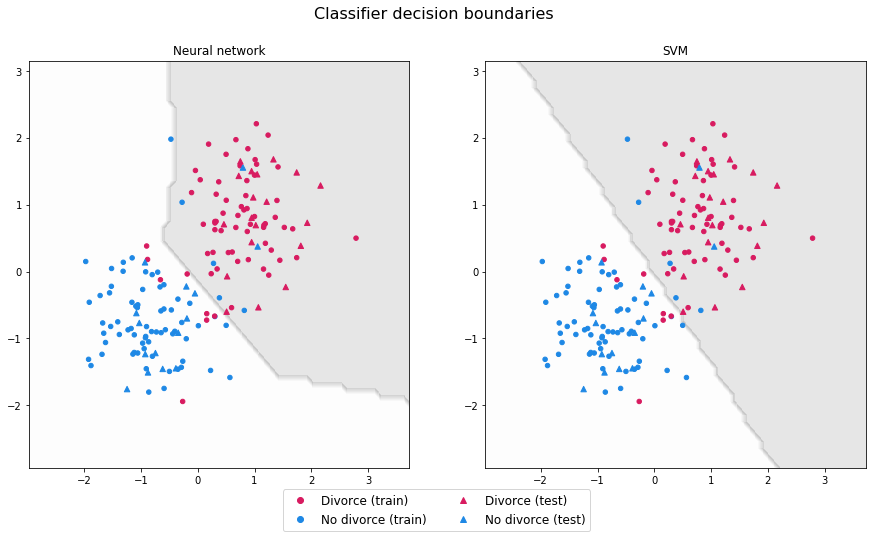

In [16]:
# Plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

y_train_color = np.where(y_train == 1, '#D81B60', '#1E88E5')
y_test_color = np.where(y_test == 1, '#D81B60', '#1E88E5')

fig, axs = plt.subplots(1, 2, sharex='col', figsize=(15, 7.5))

for i, clf, title in zip(range(3),
                      [best_clf_nn, best_clf_svm],
                      ['Neural network', 'SVM']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axs[i].contourf(xx, yy, Z, alpha=0.1, cmap='binary')  # Draw decision boundary
    # Plot data points
    axs[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train_color, s=20, edgecolors=y_train_color, marker='o')
    axs[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test_color, s=30, edgecolors=y_test_color, marker='^')
    axs[i].set_title(title, fontsize=12)
    
handles, labels = axs[1].get_legend_handles_labels()
legend_1 = Line2D(range(1), range(1), marker='o', linewidth=0,
                  color='#D81B60', markerfacecolor='#D81B60', label='Divorce (train)')
legend_2 = Line2D(range(1), range(1), marker='o', linewidth=0,
                  color='#1E88E5', markerfacecolor='#1E88E5', label='No divorce (train)')
legend_3 = Line2D(range(1), range(1), marker='^', linewidth=0,
                  color='#D81B60', markerfacecolor='#D81B60', label='Divorce (test)')
legend_4 = Line2D(range(1), range(1), marker='^', linewidth=0,
                  color='#1E88E5', markerfacecolor='#1E88E5', label='No divorce (test)')

fig.legend(handles=[legend_1, legend_2, legend_3, legend_4], ncol=2, loc='lower center', fontsize=12)
fig.suptitle("Classifier decision boundaries", fontsize=16)
    
plt.show()

# Part 2: Handwritten digits classification

In [17]:
# Additional imports
from scipy.io import loadmat

In [18]:
# Load data and transpose
image_data = loadmat('data.mat')
X = image_data['data'].T  # No need to standardize this as every pixel is already on the same scale

In [19]:
label_data = loadmat('label.mat')
y = np.where(label_data['trueLabel'].flatten() == 6, 1, 0)  # Label "6" = 1, else 0

In [20]:
# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
# Try various step sizes for neural network
nn_step_sizes = [0.1, 0.01, 0.001]
nn_accuracies = []
nn_models = []

for step_size in nn_step_sizes:
    clf_nn, nn_accuracy = score_nn(step_size, X_train, y_train, X_test, y_test)
    nn_accuracies.append(nn_accuracy)
    nn_models.append(clf_nn)
    
    print(f"Step size: {step_size}, accuracy: {nn_accuracy}")

Step size: 0.1, accuracy: 0.9824120603015075
Step size: 0.01, accuracy: 0.9773869346733668
Step size: 0.001, accuracy: 0.9824120603015075


C:\Users\ArthurWang\.conda\envs\omsa\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [22]:
# Get the best neural network with its step size and score
best_nn_step_size = nn_step_sizes[np.argmax(nn_accuracies)]
best_nn_accuracy = np.max(nn_accuracies)
best_clf_nn = nn_models[np.argmax(nn_accuracies)]

In [23]:
# Try various values of C
svm_Cs = [1.0, 0.1, 0.01]
svm_accuracies = []
svm_models = []

for C in svm_Cs:
    clf_svm, svm_accuracy = score_svm(C, X_train, y_train, X_test, y_test)
    svm_accuracies.append(svm_accuracy)
    svm_models.append(clf_svm)
    
    print(f"C: {C}, accuracy: {svm_accuracy}")

C: 1.0, accuracy: 0.9874371859296482
C: 0.1, accuracy: 0.9849246231155779
C: 0.01, accuracy: 0.9773869346733668


In [24]:
# Get the best SVC with its C and score
best_svm_C = svm_Cs[np.argmax(svm_accuracies)]
best_svm_accuracy = np.max(svm_accuracies)
best_clf_svm = svm_models[np.argmax(svm_accuracies)]

In [25]:
print(f"Neural network accuracy (best with step size={best_nn_step_size}): {best_nn_accuracy}")
print(f"SVM accuracy (best with C={best_svm_C}): {best_svm_accuracy}")

Neural network accuracy (best with step size=0.1): 0.9824120603015075
SVM accuracy (best with C=1.0): 0.9874371859296482
